#### Figure 5

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


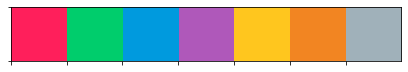

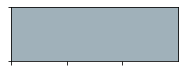

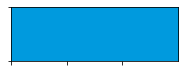

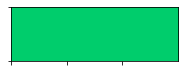

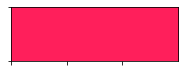

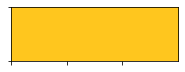

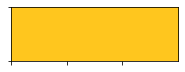

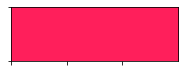

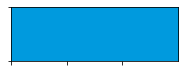

In [1]:
%matplotlib inline
%run settings_load.py

#### Figure 5
NOTE: this section has to be updated with new par2 and par3 runs (and rerun of minimal2)

##### thin data

In [46]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

100 288 588 976


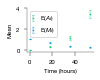

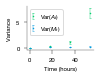

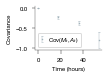

In [48]:
data = res[0].data
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.data_mean_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_thin4_mean.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.data_variance_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_thin4_var.pdf', settings=settings)

settings = {
    ('M_t', 'A_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.data_covariance_plot(data, x_label='Time (hours)', save='paper_figures/data_cd44_thin4_cov.pdf', settings=settings)

In [12]:
net_names = [est.net.net_name for est in res]
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)
model_probs_unif = me.selection.compute_model_probabilities(res)
print(list(model_probs).index(max(model_probs)))
print(list(model_probs_unif).index(max(model_probs_unif)))

1.000000000000017
39
291


2.114399286073702e-11
0.22947033920494325
0.3569926668482579
0.4135369939256563
1
99
288
588


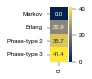

In [9]:
print(sum(model_probs[0:1]))
print(sum(model_probs[1:100]))
print(sum(model_probs[100:388]))
print(sum(model_probs[388:]))

print(len(model_probs[0:1]))
print(len(model_probs[1:100]))
print(len(model_probs[100:388]))
print(len(model_probs[388:]))

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([sum(model_probs[0:1]), sum(model_probs[1:100]), sum(model_probs[100:388]), sum(model_probs[388:])]) * 100.0, index=['Markov', 'Erlang', 'Phase-type 2', 'Phase-type 3']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_thin4.pdf', bbox_inches='tight')

39
191
405
39
191
39
min_d_2_l_20 par2_d_6_10_l_18 par3_d_6_8_18_l_18
2.9724474855900235e-12
0.2929864106052875
0.4422602214060325
0.2647533679857067


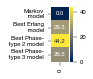

In [11]:
res1_probs = me.selection.compute_model_probabilities(res1)
res2_probs = me.selection.compute_model_probabilities(res2)
res3_probs = me.selection.compute_model_probabilities(res3)
print(list(res1_probs).index(max(res1_probs)))
print(list(res2_probs).index(max(res2_probs)))
print(list(res3_probs).index(max(res3_probs)))

print(list(model_probs[0:100]).index(max(model_probs[0:100])))
print(list(model_probs[100:388]).index(max(model_probs[100:388])))
print(list(model_probs).index(max(model_probs)))

bestof_probs = me.selection.compute_model_probabilities([
                    res[0], res[39], res[100+191], res[100+288+405]])
print(net_names[39], net_names[100+191], net_names[100+288+405])
print(bestof_probs[0])
print(bestof_probs[1])
print(bestof_probs[2])
print(bestof_probs[3])

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([bestof_probs[0], bestof_probs[1], bestof_probs[2], bestof_probs[3]]) * 100.0, index=['Markov\n model', 'Best Erlang\n model', 'Best Phase-\n type 2 model', 'Best Phase-\n type 3 model']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/models_probs_map_thin4_bestof.pdf', bbox_inches='tight')

In [44]:
print(res1[0].bay_est_log_evidence)
print(max([est.bay_est_log_evidence for est in res1]))
print(max([est.bay_est_log_evidence for est in res2]))
print(max([est.bay_est_log_evidence for est in res3]))
me.selection.compute_model_probabilities_from_log_evidences(
    np.array([14.997059839504479,
                40.3456658752788,
                40.757438092577324,
                40.244338353305984]))

15.031659493255871
40.3456658752788
40.757438092577324
40.244338353305984


array([2.87136070e-12, 2.92986411e-01, 4.42260221e-01, 2.64753368e-01])

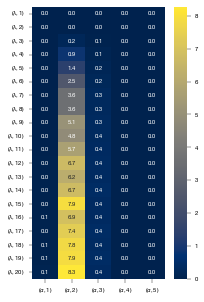

In [53]:
res = pickle.load(open('estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)

steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(1, 6) # range(4, 8) # [3]
rows = [fr'$(\lambda, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(\alpha, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_alpha[j]}_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('paper_figures/model_probs_cd44_thin4_minimal2.pdf')

In [47]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data

100 288 588 976


In [48]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [49]:
print(net_names[list(model_probs).index(max(model_probs))])

par2_d_6_10_l_18


In [53]:
# idea to compute "credible bands" for better visualisation
samples = 40000
plot_data = True # True or False
time_max = 100.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[ 9194.     0. 14237. 16569.]


In [54]:
# to also plot full data
res1_full = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
data_full = res1_full[0].data

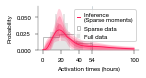

In [55]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.8, 0.8)}) # 1.4, 1.8
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    # we find the events on full data 
    # (otherwise the function ignores some well that dont maintain cell sum)
    data_full.events_find_all()
    data_act_full = np.array([tup[1] for tup in data_full.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act_full - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.25, linewidth=1.0,
             density=True, histtype='step', label='Sparse data')
    plt.hist(data_act_full - 1e-06, bins=data_full.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled', label='Full data')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200, label='Inference \n(Sparse moments)')
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

# plot experimental window
plt.axvline(x=54.0, linewidth=0.5, color=grey)
plt.xticks([0, 20, 40, 54, 100], [0, 20, 40, 54, 100])

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_act_long100.pdf', bbox_inches='tight') # pdf, png

In [56]:
# idea to compute "credible bands" for better visualisation
samples = 40000
plot_data = False # True or False
time_max = 54.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[ 9142.     0. 14240. 16618.]


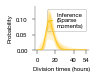

In [58]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (0.97, 0.8)}) # 1.4,, 0.97
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200, label='Inference \n(Sparse\nmoments)')
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.xticks([0, 20, 40, 54], [0, 20, 40, 54])
plt.ylim(0.0, None)

plt.legend()
plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_div.pdf', bbox_inches='tight') # pdf, png

In [57]:
# best model plot
# (this was 'net_alphaF6_alphaS6_alphaT14_lambda18' previously in par3)
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
list(model_probs).index(max(model_probs))

191

In [52]:
print(net_names[191])
est = res[191]

# repair est from previous memopy version
est.net_simulation_credible_band_exists = False
est.data.data_mean_exists_only = False
est.net_time_values_dense = est.data_time_values_dense

par2_d_6_10_l_18


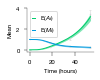

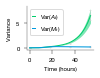

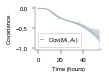

In [53]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_thin4_mean_par2_d_6_10_l_18.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_thin4_var_par2_d_6_10_l_18.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_thin4_cov_par2_d_6_10_l_18.pdf', settings=settings)

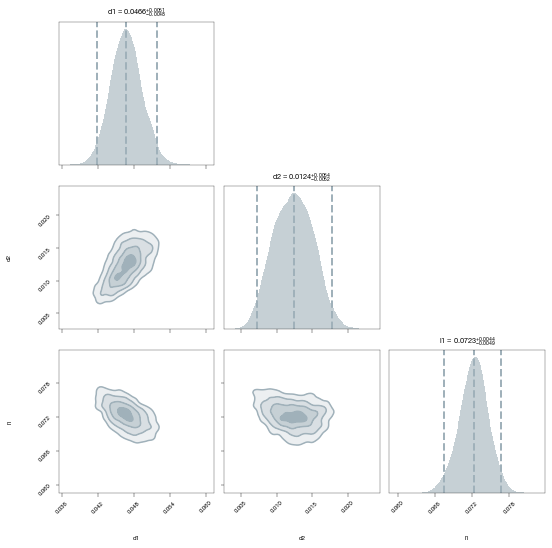

In [54]:
me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_par2_d_6_10_l_18.pdf')

100 288 588 976
385
591
(976,)


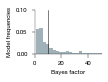

In [56]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_new.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
bf = me.selection.compute_model_bayes_factors(res)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 50)) # 110
plt.ylim((0.0, 0.1))
plt.hist(bf, bins=40, density=True, color=grey)
plt.axvline(x=10.0, lw=0.5, color='black')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('paper_figures/bfs_cd44_thin4.pdf', bbox_inches='tight')

print(np.sum(bf < 10.0))
print(np.sum(bf >= 10.0))
print(bf.shape)

In [63]:
# just a check
# bf = me.selection.compute_model_bayes_factors(res)
# inds = bf.argsort()
# net_names_sorted = np.array(net_names)[inds]

# net_names_sorted[0:370]

In [116]:
res1a = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))
res1b = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))
res1c = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par3_new.pickle', 'rb'))
res1 = res1a + res1b + res1c

res2a = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2b = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res2c = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3_new.pickle', 'rb'))
res2 = res2a + res2b + res2c

print([est.net.net_name for est in res1] == [est.net.net_name for est in res2])
print([est.net.net_name for est in res1a] == [est.net.net_name for est in res2a])
print([est.net.net_name for est in res1b] == [est.net.net_name for est in res2b])
print([est.net.net_name for est in res1c] == [est.net.net_name for est in res2c])
model_logevids_thin4 = [est.bay_est_log_evidence for est in res1]
model_logevids_full = [est.bay_est_log_evidence for est in res2]

print(stats.spearmanr(model_logevids_full, model_logevids_thin4))
print(stats.pearsonr(model_logevids_full, model_logevids_thin4))

False
False
True
True
SpearmanrResult(correlation=0.7980003510760093, pvalue=1.9663508112171953e-216)
(0.6244431613173873, 1.2345754309672264e-106)


In [117]:
res1c[76].net.net_name

'par3_d_2_4_10_l_18'

In [118]:
res2c[76].net.net_name

'par3_d_2_4_10_l_18'

0.6244431613173871

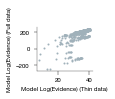

In [70]:
plt.rcParams.update({'figure.figsize': (1.0, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.scatter(model_logevids_thin4, model_logevids_full, color=grey, s=1.0)
plt.xlabel('Model Log(Evidence) (Thin data)')
plt.ylabel('Model Log(Evidence) (Full data)')
plt.xlim((None, None))
plt.ylim((None, None))
# plt.axis('square')
plt.savefig('paper_figures/evidence_corr_thin_vs_full_data.pdf', bbox_inches='tight')

np.corrcoef(model_logevids_thin4, model_logevids_full)[0, 1]

1.000000000000017


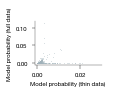

In [76]:
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
model_probs_thin4 = me.selection.compute_model_probabilities(res1, mprior=mprior)
model_probs_full = me.selection.compute_model_probabilities(res2, mprior=mprior)

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.scatter(model_probs_thin4, model_probs_full, color=grey, alpha=0.5, s=1.0, lw=0.0) # , s=1.0)
plt.xlabel('Model probability (thin data)')
plt.ylabel('Model probability (full data)')
plt.xlim((None, 0.03))
plt.ylim((None, None))
plt.savefig('paper_figures/model_probs_thin_vs_full_data.pdf', bbox_inches='tight')

In [119]:
# How many models needed to have >95% of combined posterior probability?
sort_inds = np.array(- model_probs_thin4).argsort()
model_probs_sorted_thin4 = np.array(model_probs_thin4)[sort_inds]

sort_inds = np.array(- model_probs_full).argsort()
model_probs_sorted_full = np.array(model_probs_full)[sort_inds]

index_thin4 = model_probs_sorted_thin4.cumsum().searchsorted(0.95)
index_full = model_probs_sorted_full.cumsum().searchsorted(0.95)
print(index_thin4, index_full)

440 122


In [120]:
print(model_probs_sorted_thin4.cumsum()[440],
      model_probs_sorted_full.cumsum()[122])

0.9500921841991591 0.9500764766977169


False


0.7980003510760093

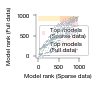

In [124]:
net_names = [est.net.net_name for est in res1]
print(net_names == [est.net.net_name for est in res2])

model_rank_thin4 = np.array(list(range(0, len(res1))))
model_rank_full = np.array(list(range(0, len(res2))))

inds = np.array(model_logevids_thin4).argsort()
model_rank_thin4_sorted = model_rank_thin4[inds]

inds = np.array(model_logevids_full).argsort()
model_rank_full_sorted = model_rank_full[inds]

x_rank = list(range(0, len(res1)))
y_rank = list()
for x in x_rank:
    ind_thin4 = model_rank_thin4_sorted[x]
    y_rank.append(list(model_rank_full_sorted).index(ind_thin4))
    
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# plt.axhline(y=len(y_rank)-index_full, color='b', linestyle='-', alpha=0.5, linewidth=0.5)
# plt.axvline(x=len(x_rank)-index_thin4, color='b', linestyle='-', alpha=0.5, linewidth=0.5)
import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle((len(x_rank)-index_thin4, 0), index_thin4, len(y_rank), 
                      color=cwact, alpha=0.15, linewidth=0.0, label='Top models\n(Sparse data)'))
ax.add_patch(
    patches.Rectangle((0, len(y_rank)-index_full), len(x_rank), index_full, 
                      color=cwdiv, alpha=0.25, linewidth=0.0, label='Top models\n(Full data)'))

plt.scatter(x_rank, y_rank, color=grey, alpha=0.5, s=1.0, lw=0.0, zorder=1000) # , s=1.0)
plt.xlabel('Model rank (Sparse data)')
plt.ylabel('Model rank (Full data)')
plt.xlim((None, None))
plt.ylim((None, None))
plt.xticks([0, 500, 1000])
plt.legend()
plt.axis('square')
plt.savefig('paper_figures/rank_corr_thin_vs_full_data.pdf', bbox_inches='tight')

np.corrcoef(x_rank, y_rank)[0, 1]

##### minimal model (new version and mean only)

In [78]:
# res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2.pickle', 'rb'))
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2_meanfit.pickle', 'rb'))

In [79]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.04514801 0.04265994 0.04261217 0.04231045 0.04159293 0.04141503
 0.03717143 0.03576711 0.03563724 0.03481212]
[13.4745652  13.41787943 13.41675902 13.40965329 13.39254919 13.38826298
 13.28015946 13.24164793 13.23801018 13.21458459]
['min_d_2_l_18' 'min_d_2_l_17' 'min_d_2_l_12' 'min_d_2_l_15'
 'min_d_2_l_14' 'min_d_2_l_20' 'min_d_2_l_9' 'min_d_2_l_16' 'min_d_2_l_7'
 'min_d_2_l_19']


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

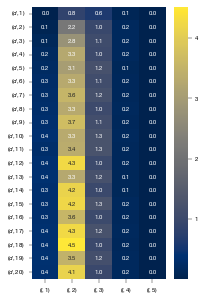

In [62]:
steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(1, 6) # range(4, 8) # [3]
rows = [fr'$(d, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(l, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'min_d_{steps_alpha[j]}_l_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
# plt.savefig('paper_figures/model_probs_cd44_minimal2_meanfit.pdf')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

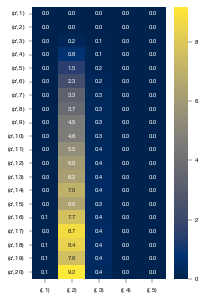

In [114]:
steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(1, 6) # range(4, 8) # [3]
rows = [fr'$(d, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(l, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'min_d_{steps_alpha[j]}_l_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
# plt.savefig('paper_figures/model_probs_cd44_minimal2_meanfit.pdf')

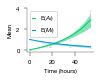

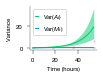

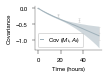

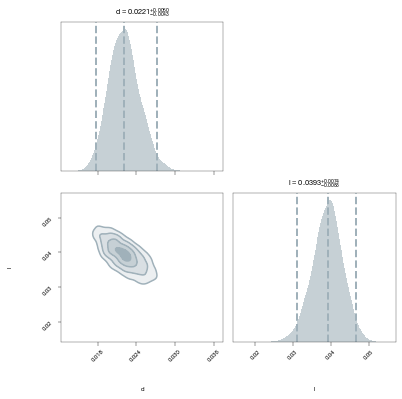

In [122]:
est = res[0]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', settings=settings)

me.plots.est_corner_kernel_plot(est)

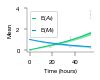

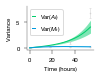

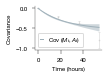

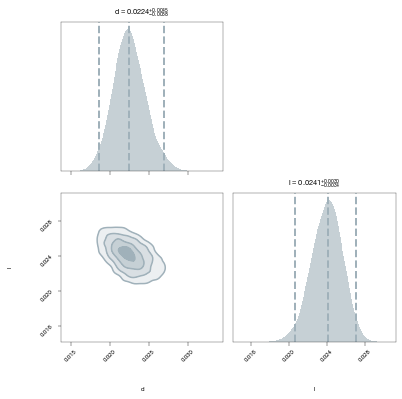

In [116]:
est = res[0]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', settings=settings)

me.plots.est_corner_kernel_plot(est)

37


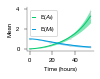

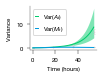

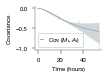

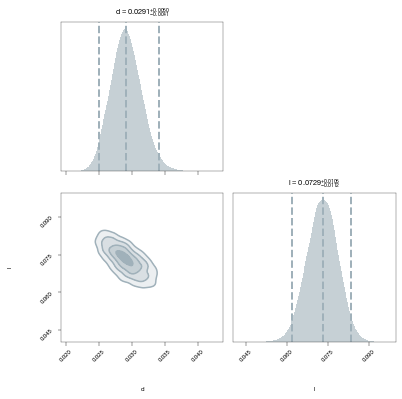

In [125]:
print(net_names.index('min_d_2_l_18')) # 37
est = res[37]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', 
                               save='paper_figures/fit_cd44_mean_min_d_2_l_18_thin4_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', 
                                   save='paper_figures/fit_cd44_var_min_d_2_l_18_thin4_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', 
                                     save='paper_figures/fit_cd44_cov_min_d_2_l_18_thin4_meanfit.pdf', settings=settings)

me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_min_d_2_l_18_thin4_meanfit.pdf',)

39


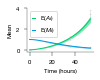

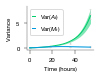

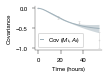

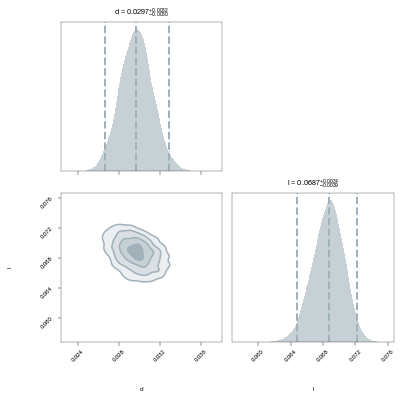

In [118]:
print(net_names.index('min_d_2_l_20')) # 39
est = res[39]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', settings=settings)

me.plots.est_corner_kernel_plot(est)

In [63]:
mprior = np.array([1/len(res)]*len(res))
data = res[0].data

In [64]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = True # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[20000.     0.     0.     0.]


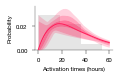

In [65]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_act_meanfit_minimal2.pdf', bbox_inches='tight') # pdf, png

In [66]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = False # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[20000.     0.     0.     0.]


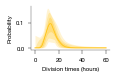

In [67]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_div_meanfit_minimal2.pdf', bbox_inches='tight') # pdf, png

In [68]:
# compare 
me.selection.compute_model_probabilities_from_log_evidences(np.array([
    13.4745652, # best minimal2 model (meanfit + thin4)
    12.37852592, # best par2 model (meanfit + thin4)
]))

array([0.74951725, 0.25048275])

In [81]:
res[0].net.net_rates_identifier

{'theta_0': 'd', 'theta_1': 'l'}

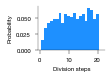

In [83]:
samples = 10000
div_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    div_steps.append(est.net.net_modules[1]['module_steps'])
    
    if not est.net.net_modules[1]['sym_rate']=='l':
        print('error')

plt.hist(np.array(div_steps), bins=np.linspace(1, 22, endpoint=True, num=22)-0.5, 
         density=True, color='dodgerblue')
# plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Division steps')
# plt.savefig('waiting_times_div_steps.pdf')
plt.show()

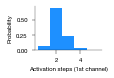

In [87]:
samples = 50000
alpha_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    alpha_steps.append(est.net.net_modules[0]['module_steps'])
    
    if not est.net.net_modules[0]['sym_rate']=='d':
        print('error')

plt.hist(np.array(alpha_steps), bins=np.linspace(1, 6, endpoint=True, num=6)-0.5, 
         density=True, color='dodgerblue')
# plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Activation steps (1st channel)')
# plt.savefig('waiting_times_act_steps.pdf')
plt.show()

##### par2 model (new version and mean only)

In [98]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))

In [99]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(len(res))
print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

288
[0.03059841 0.03031175 0.02573055 0.02561168 0.02553119 0.02382151
 0.02349241 0.02263167 0.0222928  0.02186119]
[40.75743809 40.74802534 40.5841689  40.57953847 40.57639063 40.50707906
 40.49316749 40.45584005 40.4407535  40.42120283]
['par2_d_6_10_l_18' 'par2_d_6_10_l_14' 'par2_d_4_6_l_18'
 'par2_d_8_14_l_14' 'par2_d_8_14_l_18' 'par2_d_8_14_l_10'
 'par2_d_4_8_l_18' 'par2_d_4_6_l_14' 'par2_d_4_8_l_14' 'par2_d_6_10_l_10']


In [72]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2_meanfit.pickle', 'rb'))

In [73]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(len(res))
print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

288
[0.01957247 0.01807416 0.01665948 0.01595331 0.01500939 0.01375367
 0.01244657 0.01103253 0.01026173 0.01007725]
[12.37852592 12.29888485 12.21738139 12.17406803 12.11307795 12.02570749
 11.92584648 11.80525032 11.73282342 11.71468257]
['par2_d_2_2_l_14' 'par2_d_2_2_l_18' 'par2_d_2_2_l_8' 'par2_d_2_2_l_6'
 'par2_d_2_2_l_10' 'par2_d_2_2_l_4' 'par2_d_2_4_l_10' 'par2_d_2_4_l_14'
 'par2_d_2_4_l_8' 'par2_d_4_8_l_18']


In [74]:
print(net_names.index('par2_d_2_2_l_14'))

70


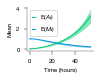

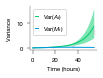

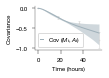

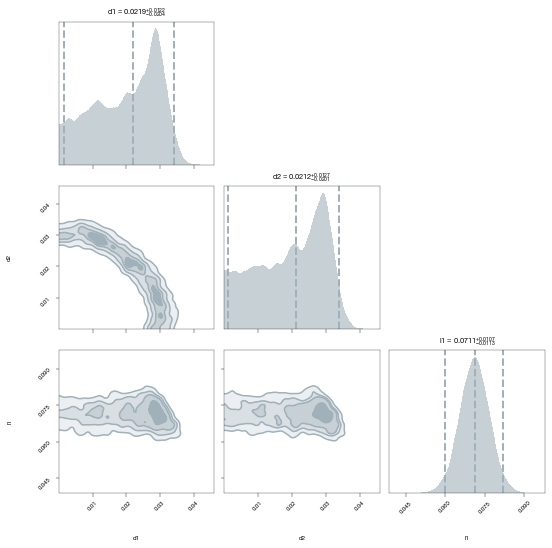

In [54]:
est = res[70]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False
est.net_simulation_credible_band_exists = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', settings=settings)

me.plots.est_corner_kernel_plot(est)

In [55]:
mprior = np.array([1/len(res)]*len(res))
data = res[0].data

In [56]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = True # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[    0.     0. 20000.     0.]


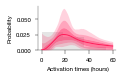

In [57]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_act_meanfit_par2.pdf', bbox_inches='tight') # pdf, png

In [58]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = False # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[    0.     0. 20000.     0.]


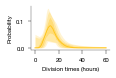

In [59]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_div_meanfit_par2.pdf', bbox_inches='tight') # pdf, png

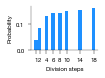

In [75]:
samples = 10000
div_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    div_steps.append(est.net.net_modules[2]['module_steps'])
    
    if not est.net.net_modules[2]['sym_rate']=='l1':
        print('error')

plt.hist(np.array(div_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Division steps')
# plt.savefig('waiting_times_div_steps.pdf')
plt.show()

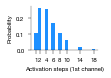

In [76]:
samples = 50000
alpha_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    alpha_steps.append(est.net.net_modules[0]['module_steps'])
    
    if not est.net.net_modules[0]['sym_rate']=='d1':
        print('error')

plt.hist(np.array(alpha_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Activation steps (1st channel)')
# plt.savefig('waiting_times_act_steps.pdf')
plt.show()

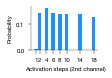

In [77]:
samples = 50000
alpha_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    alpha_steps.append(est.net.net_modules[1]['module_steps'])
    
    if not est.net.net_modules[1]['sym_rate']=='d2':
        print('error')

plt.hist(np.array(alpha_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Activation steps (2nd channel)')
# plt.savefig('waiting_times_act_steps.pdf')
plt.show()

##### par1+i thin4
On thin4 data par2 and par1+i model are equally good

In [100]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2.pickle', 'rb'))

In [101]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(len(res))
print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

288
[0.03059841 0.03031175 0.02573055 0.02561168 0.02553119 0.02382151
 0.02349241 0.02263167 0.0222928  0.02186119]
[40.75743809 40.74802534 40.5841689  40.57953847 40.57639063 40.50707906
 40.49316749 40.45584005 40.4407535  40.42120283]
['par2_d_6_10_l_18' 'par2_d_6_10_l_14' 'par2_d_4_6_l_18'
 'par2_d_8_14_l_14' 'par2_d_8_14_l_18' 'par2_d_8_14_l_10'
 'par2_d_4_8_l_18' 'par2_d_4_6_l_14' 'par2_d_4_8_l_14' 'par2_d_6_10_l_10']


In [102]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par1+i.pickle', 'rb'))

In [103]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(len(res))
print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

49
[0.0574866  0.05539989 0.05296309 0.05119699 0.04804569 0.04447901
 0.04024683 0.03870553 0.03736597 0.03588551]
[40.6138079  40.57683357 40.53185126 40.49793687 40.4344084  40.35727338
 40.25728727 40.21823852 40.18301654 40.14258971]
['net_4_18' 'net_4_14' 'net_6_10' 'net_6_18' 'net_6_14' 'net_4_10'
 'net_4_8' 'net_8_14' 'net_8_10' 'net_8_18']


In [104]:
me.selection.compute_model_probabilities_from_log_evidences(np.array(
[40.75743809, 40.6138079]))

array([0.53584594, 0.46415406])

##### thin4 + meanfit

In [88]:
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_minimal2_meanfit.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_thin4_par2_meanfit.pickle', 'rb'))
res3 = []
# TODO: add par3
# res3 = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par3.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data

100 288 0 388


In [92]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 ) * 1/(3*0.25) # + [0.25/588]*588
data = res[0].data
print(sum(mprior))
print(len(mprior))

1.000000000000008
388


In [93]:
print(net_names[list(model_probs).index(max(model_probs))])

min_d_2_l_18


In [94]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = True # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[15800.     0.  4200.     0.]


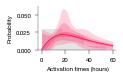

In [95]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_meanfit_act.pdf', bbox_inches='tight') # pdf, png

In [96]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = False # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[15883.     0.  4117.     0.]


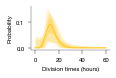

In [97]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_thin4_meanfit_div.pdf', bbox_inches='tight') # pdf, png

##### minimal model mean-only

In [9]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2_meanfit.pickle', 'rb'))

In [10]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]

sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.06633111 0.0648332  0.06071439 0.05938814 0.05862469 0.05644647
 0.05519772 0.05375394 0.05371486 0.05364467]
[75.46725385 75.44441257 75.3787755  75.3566893  75.34375073 75.30588758
 75.2835164  75.25701171 75.25628445 75.25497702]
['net_3_15' 'net_3_16' 'net_3_17' 'net_3_14' 'net_3_19' 'net_3_12'
 'net_3_10' 'net_3_11' 'net_3_20' 'net_3_18']


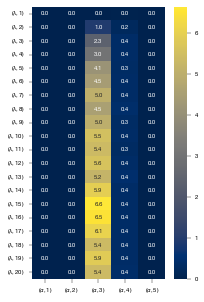

In [11]:
steps_list = range(1, 11) # 11, 21

steps_lambda = range(1, 21) # range(1, 21) # [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80]
steps_alpha = range(1, 6) # range(4, 8) # [3]
rows = [fr'$(\lambda, {i})$' for i in steps_lambda] # steps_list # range(1, 21)]
cols = [fr'$(\alpha, {i})$' for i in steps_alpha] # steps_list # range(1, 6)]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_alpha[j]}_{steps_lambda[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(3, 5)) # 8, 4 or 6, 8
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('paper_figures/model_probs_cd44_minimal2_meanfit.pdf')

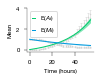

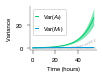

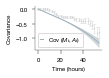

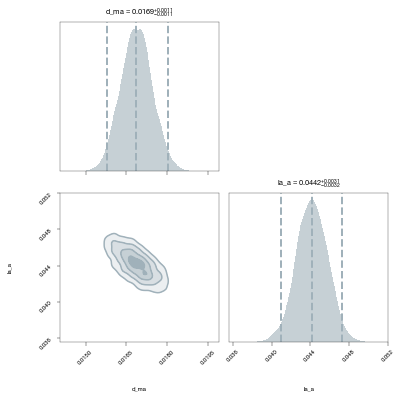

In [16]:
est = res[0]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_net_1_1_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_net_1_1_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_net_1_1_meanfit.pdf', settings=settings)

me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_cov_net_1_1_meanfit.pdf')

54


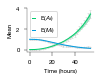

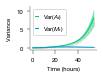

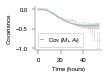

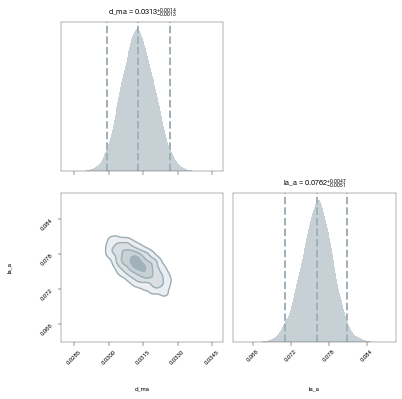

In [18]:
print(net_names.index('net_3_15')) # 54
est = res[54]

# repair data set (due to newer memopy version)
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_net_3_15_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_net_3_15_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_net_3_15_meanfit.pdf', settings=settings)

me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_cov_net_3_15_meanfit.pdf')

##### par 2 mean only

In [80]:
res = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2_meanfit.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
log_evids = [est.bay_est_log_evidence for est in res]
print(len(res))

288


In [81]:
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = np.array(log_evids)[sort_inds]

print(model_probs_sorted[:10])
print(log_evids_sorted[:10])
print(net_names_sorted[:10])

[0.09698074 0.07973021 0.06418389 0.06175942 0.05079801 0.03152467
 0.03127389 0.02623562 0.02416118 0.02296904]
[81.3567456  81.16088175 80.94398537 80.90547963 80.71009029 80.23300363
 80.22501683 80.04935138 79.96698034 79.9163802 ]
['par2_d_6_8_l_14' 'par2_d_6_8_l_18' 'par2_d_6_8_l_8' 'par2_d_6_8_l_10'
 'par2_d_6_8_l_6' 'par2_d_6_10_l_14' 'par2_d_6_10_l_18' 'par2_d_6_6_l_18'
 'par2_d_6_6_l_10' 'par2_d_6_8_l_4']


In [82]:
est_i = list(model_probs).index(max(model_probs))
print(est_i, net_names[est_i])
est = res[est_i]
print(est.bay_est_log_evidence)

# repair est object due to new memopy version
est.data.data_mean_exists_only = False

182 par2_d_6_8_l_14
81.3567456045947


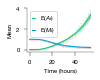

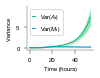

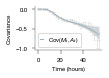

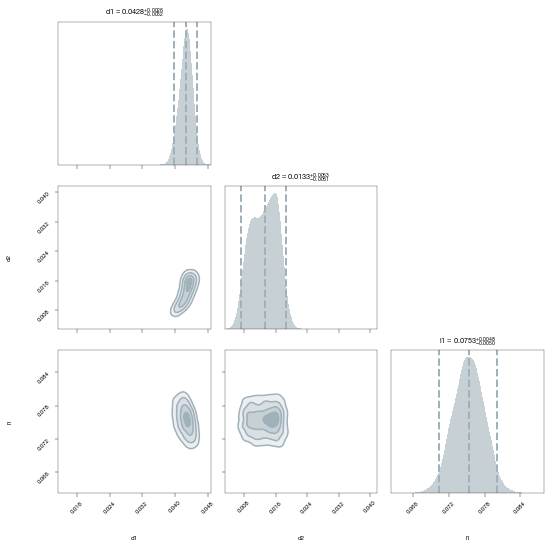

In [75]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'A_t': {'label': 'E$(A_t)$', 'color': cactiv},
    'M_t': {'label': 'E$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_mean_par2_d_6_8_l_14_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var$(A_t)$', 'color': cactiv},
    ('M_t', 'M_t'): {'label': 'Var$(M_t)$', 'color': cnaive}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_var_par2_d_6_8_l_14_meanfit.pdf', settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov$(M_t, A_t)$', 'color': grey}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (hours)', save='paper_figures/fit_cd44_cov_par2_d_6_8_l_14_meanfit.pdf', settings=settings)

me.plots.est_corner_kernel_plot(est, save='paper_figures/post_cd44_par2_d_6_8_l_14_meanfit.pdf')

In [76]:
# compare to best minimal model (mean only fit)
me.selection.compute_model_probabilities_from_log_evidences(np.array([
    75.46725385, # net_3_15
    81.3567456045947, # par2_d_6_8_l_14
]))

array([0.00276074, 0.99723926])

In [83]:
data = res[0].data
mprior = np.array([1/len(res)]*len(res))
print(len(mprior))
print(np.sum(mprior))

288
1.0000000000000002


In [84]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = True # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

y = waiting_time_distr_samples_act(x, res, samples, time_max, mprior)

[    0.     0. 20000.     0.]


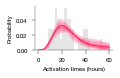

In [85]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')


plt.fill_between(x, y_997_lower, y_95_lower, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwact, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwact, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwact, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='lightseagreen', lw=2, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='lightseagreen', lw=2, alpha=0.6)
plt.plot(x, y_median, color=cwact, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='lightseagreen', lw=2, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='lightseagreen', lw=2, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='lightseagreen', lw=2, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Activation times (hours)')
plt.savefig('paper_figures/waiting_times_act_par2_meanfit.pdf', bbox_inches='tight') # pdf, png

In [86]:
# idea to compute "credible bands" for better visualisation
samples = 20000
plot_data = False # True or False
time_max = 60.0 # 150.0, 54.0
x = np.linspace(0.0, time_max, num=200)

# NOTE: the data we plot here is only from first divisions! (so its not the complete data, 
# which is inaccessible from the data)

y = waiting_time_distr_samples_div(x, res, samples, time_max, mprior)

[    0.     0. 20000.     0.]


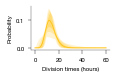

In [87]:
y_997_lower = np.percentile(y, 0.15, axis=1)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_68_lower = np.percentile(y, 16.0, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_68_upper = np.percentile(y, 84.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)
y_997_upper = np.percentile(y, 99.85, axis=1)

plt.rcParams.update({'figure.figsize': (1.4, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# adapted from framework plotting methods
if plot_data:
    data.events_find_all()
    data_act = np.array([tup[1] for tup in data.event_all_first_cell_count_increase_after_cell_type_conversion if tup[0]])

    plt.hist(data_act - 1e-06, bins=data.data_time_values,
             color='black', alpha=0.1,
             density=True, histtype='stepfilled')
    
plt.fill_between(x, y_997_lower, y_95_lower, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_lower, y_68_lower, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_lower, y_median, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)

plt.fill_between(x, y_median, y_68_upper, color=cwdiv, alpha=0.6, linewidth=0.0, zorder=100)
plt.fill_between(x, y_68_upper, y_95_upper, color=cwdiv, alpha=0.4, linewidth=0.0, zorder=100)
plt.fill_between(x, y_95_upper, y_997_upper, color=cwdiv, alpha=0.2, linewidth=0.0, zorder=100)

# plt.plot(x, y_hdi_997_lower, color='darkorange', lw=0.5, alpha=0.2)
# plt.plot(x, y_hdi_95_lower, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_68_lower, color='blue', lw=0.5, alpha=0.6)
plt.plot(x, y_median, color=cwdiv, lw=1, zorder=200)
# plt.plot(x, y_hdi_68_upper, color='darkorange', lw=0.5, alpha=0.6)
# plt.plot(x, y_hdi_95_upper, color='darkorange', lw=0.5, alpha=0.4)
# plt.plot(x, y_hdi_997_upper, color='darkorange', lw=0.5, alpha=0.2)

plt.ylabel('Probability')
plt.xlabel('Division times (hours)')
plt.savefig('paper_figures/waiting_times_div_par2_meanfit.pdf', bbox_inches='tight') # pdf, png

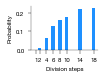

In [89]:
samples = 10000
div_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    div_steps.append(est.net.net_modules[2]['module_steps'])
    
    if not est.net.net_modules[2]['sym_rate']=='l1':
        print('error')

plt.hist(np.array(div_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Division steps')
# plt.savefig('waiting_times_div_steps.pdf')
plt.show()

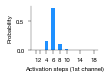

In [96]:
samples = 50000
alpha_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    alpha_steps.append(est.net.net_modules[0]['module_steps'])
    
    if not est.net.net_modules[0]['sym_rate']=='d1':
        print('error')

plt.hist(np.array(alpha_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Activation steps (1st channel)')
# plt.savefig('waiting_times_act_steps.pdf')
plt.show()

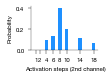

In [98]:
samples = 50000
alpha_steps = list()

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

for __ in range(samples):
    # get random model according to p(M|D)
    model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
    est = res[model_rand]
    
    alpha_steps.append(est.net.net_modules[1]['module_steps'])
    
    if not est.net.net_modules[1]['sym_rate']=='d2':
        print('error')

plt.hist(np.array(alpha_steps), bins=np.linspace(1, 19, endpoint=True, num=19)-0.5, 
         density=True, color='dodgerblue')
plt.xticks([1, 2, 4, 6, 8, 10, 14, 18])
plt.ylabel('Probability')
plt.xlabel('Activation steps (2nd channel)')
# plt.savefig('waiting_times_act_steps.pdf')
plt.show()